In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd
import numpy as np
from PIL import Image
import keras
from numpy.random import seed
seed(7)

In [2]:
base_skin_dir = os.path.join('./data/ISIC2016')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Training_Data_Patch/*.png'))}

# This dictionary is useful for displaying more human-friendly labels later on

lesion_type_dict = {
    'benign': 'Non-melanoma',
    'malignant': 'Melanoma'
}

In [3]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Training_GroundTruth_patch.csv'))


# Creating New Columns for better readability
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [4]:
# Now lets see the sample of tile_df to look on newly made columns
skin_df.head()

,image_id,dx,path,cell_type,cell_type_idx
0,ISIC_0000425_0,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1
1,ISIC_0000425_1,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1
2,ISIC_0000425_2,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1
3,ISIC_0000425_3,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1
4,ISIC_0000425_4,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1


In [5]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))

In [6]:
skin_df.head()

,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000425_0,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[220, 149, 117], [221, 148, 116], [221, 148,..."
1,ISIC_0000425_1,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[223, 147, 115], [223, 147, 115], [222, 146,..."
2,ISIC_0000425_2,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[232, 160, 136], [232, 160, 136], [231, 159,..."
3,ISIC_0000425_3,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[208, 131, 87], [208, 131, 87], [208, 131, 8..."
4,ISIC_0000425_4,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[220, 152, 117], [219, 151, 116], [218, 150,..."


In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Training_Data/*.jpg'))}

skin_df_train_orignal = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Training_GroundTruth.csv'))

# Creating New Columns for better readability
skin_df_train_orignal['path'] = skin_df_train_orignal['image_id'].map(imageid_path_dict.get)
skin_df_train_orignal['cell_type'] = skin_df_train_orignal['dx'].map(lesion_type_dict.get) 
skin_df_train_orignal['cell_type_idx'] = pd.Categorical(skin_df_train_orignal['cell_type']).codes


skin_df_train_orignal['image'] = skin_df_train_orignal['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
skin_df_train_orignal.head()

,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000000,benign,./data/ISIC2016/ISIC2016_Training_Data/ISIC_00...,Non-melanoma,1,"[[[187, 203, 220], [166, 196, 222], [172, 197,..."
1,ISIC_0000001,benign,./data/ISIC2016/ISIC2016_Training_Data/ISIC_00...,Non-melanoma,1,"[[[172, 171, 177], [156, 155, 161], [158, 157,..."
2,ISIC_0000002,malignant,./data/ISIC2016/ISIC2016_Training_Data/ISIC_00...,Melanoma,0,"[[[97, 97, 97], [62, 62, 62], [64, 64, 64], [6..."
3,ISIC_0000004,malignant,./data/ISIC2016/ISIC2016_Training_Data/ISIC_00...,Melanoma,0,"[[[96, 96, 96], [60, 60, 60], [62, 62, 62], [6..."
4,ISIC_0000006,benign,./data/ISIC2016/ISIC2016_Training_Data/ISIC_00...,Non-melanoma,1,"[[[98, 98, 98], [63, 63, 63], [64, 64, 64], [6..."


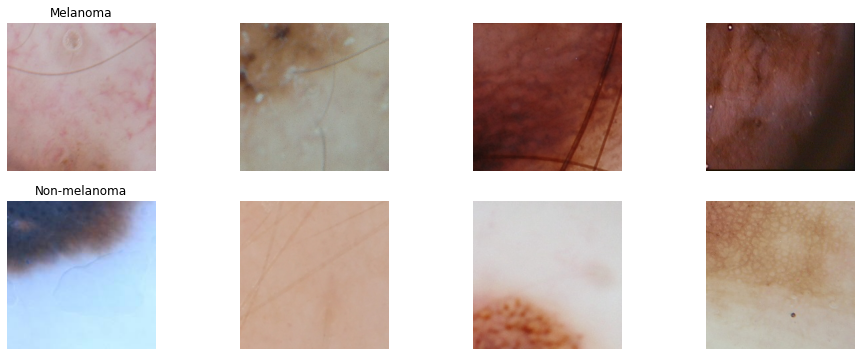

In [8]:
n_samples = 4
fig, m_axs = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
#fig.savefig('category_samples.png', dpi=300)

In [9]:
# Checking the image size distribution
skin_df['image'].map(lambda x: x.shape).value_counts()

(224, 224, 3)    8100
Name: image, dtype: int64

In [10]:
#Split Train Dataframe

skin_df1 = skin_df[0::9]
skin_df2 = skin_df[1::9]
skin_df3 = skin_df[2::9]
skin_df4 = skin_df[3::9]
skin_df5 = skin_df[4::9]
skin_df6 = skin_df[5::9]
skin_df7 = skin_df[6::9]
skin_df8 = skin_df[7::9]
skin_df9 = skin_df[8::9]

#skin_df8 = skin_df[0::9]

In [11]:
skin_df2.head()

,image_id,dx,path,cell_type,cell_type_idx,image
1,ISIC_0000425_1,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[223, 147, 115], [223, 147, 115], [222, 146,..."
10,ISIC_0009975_1,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[173, 164, 159], [173, 164, 159], [173, 164,..."
19,ISIC_0000000_1,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[165, 200, 240], [164, 199, 237], [165, 200,..."
28,ISIC_0000001_1,benign,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Non-melanoma,1,"[[[169, 168, 174], [170, 170, 172], [170, 170,..."
37,ISIC_0000002_1,malignant,./data/ISIC2016/ISIC2016_Training_Data_Patch/I...,Melanoma,0,"[[[135, 168, 237], [141, 167, 252], [140, 166,..."


In [12]:
trainfeatures1=skin_df1.drop(columns=['cell_type_idx'],axis=1)
trainfeatures2=skin_df2.drop(columns=['cell_type_idx'],axis=1)
trainfeatures3=skin_df3.drop(columns=['cell_type_idx'],axis=1)
trainfeatures4=skin_df4.drop(columns=['cell_type_idx'],axis=1)
trainfeatures5=skin_df5.drop(columns=['cell_type_idx'],axis=1)
trainfeatures6=skin_df6.drop(columns=['cell_type_idx'],axis=1)
trainfeatures7=skin_df7.drop(columns=['cell_type_idx'],axis=1)
trainfeatures8=skin_df8.drop(columns=['cell_type_idx'],axis=1)
trainfeatures9=skin_df9.drop(columns=['cell_type_idx'],axis=1)

train_target=skin_df1['cell_type_idx']

trainfeatures1.shape


(900, 5)

In [13]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Test_Data_Patch/*.png'))}

skin_df_test = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Test_GroundTruth_patch.csv'))

# Creating New Columns for better readability
skin_df_test['path'] = skin_df_test['image_id'].map(imageid_path_dict.get)
skin_df_test['cell_type'] = skin_df_test['dx'].map(lesion_type_dict.get) 
skin_df_test['cell_type_idx'] = pd.Categorical(skin_df_test['cell_type']).codes


skin_df_test['image'] = skin_df_test['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
skin_df_test.head()


,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000003_0,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[222, 221, 227], [221, 220, 226], [221, 220,..."
1,ISIC_0000003_1,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[214, 210, 209], [213, 209, 208], [213, 209,..."
2,ISIC_0000003_2,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[207, 206, 204], [210, 204, 204], [211, 205,..."
3,ISIC_0000003_3,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[219, 219, 217], [217, 215, 216], [217, 215,..."
4,ISIC_0000003_4,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[103, 66, 50], [105, 73, 62], [101, 69, 58],..."


In [14]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Test_Data/*.jpg'))}

skin_df_test_orignal = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Test_GroundTruth.csv'))

# Creating New Columns for better readability
skin_df_test_orignal['path'] = skin_df_test_orignal['image_id'].map(imageid_path_dict.get)
skin_df_test_orignal['cell_type'] = skin_df_test_orignal['dx'].map(lesion_type_dict.get) 
skin_df_test_orignal['cell_type_idx'] = pd.Categorical(skin_df_test_orignal['cell_type']).codes


skin_df_test_orignal['image'] = skin_df_test_orignal['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
skin_df_test_orignal.head()


,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000003,benign,./data/ISIC2016/ISIC2016_Test_Data/ISIC_000000...,Non-melanoma,1,"[[[234, 233, 238], [228, 227, 232], [229, 228,..."
1,ISIC_0000012,benign,./data/ISIC2016/ISIC2016_Test_Data/ISIC_000001...,Non-melanoma,1,"[[[101, 101, 103], [72, 72, 73], [75, 75, 77],..."
2,ISIC_0000013,malignant,./data/ISIC2016/ISIC2016_Test_Data/ISIC_000001...,Melanoma,0,"[[[206, 207, 212], [199, 199, 205], [203, 204,..."
3,ISIC_0000014,benign,./data/ISIC2016/ISIC2016_Test_Data/ISIC_000001...,Non-melanoma,1,"[[[97, 97, 97], [61, 61, 61], [64, 64, 64], [6..."
4,ISIC_0000015,benign,./data/ISIC2016/ISIC2016_Test_Data/ISIC_000001...,Non-melanoma,1,"[[[97, 97, 97], [63, 63, 63], [65, 65, 65], [7..."


In [15]:
# Split Test Dataframe
skin_df_test1 = skin_df_test[0::9]
skin_df_test2 = skin_df_test[1::9]
skin_df_test3 = skin_df_test[2::9]
skin_df_test4 = skin_df_test[3::9]
skin_df_test5 = skin_df_test[4::9]
skin_df_test6 = skin_df_test[5::9]
skin_df_test7 = skin_df_test[6::9]
skin_df_test8 = skin_df_test[7::9]
skin_df_test9 = skin_df_test[8::9]


In [16]:
skin_df_test9.head()

,image_id,dx,path,cell_type,cell_type_idx,image
8,ISIC_0000003_8,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[103, 60, 41], [100, 57, 40], [101, 58, 41],..."
17,ISIC_0000012_8,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[167, 148, 152], [160, 144, 145], [160, 144,..."
26,ISIC_0000013_8,malignant,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Melanoma,0,"[[[41, 37, 34], [31, 27, 24], [38, 34, 31], [4..."
35,ISIC_0000014_8,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[171, 152, 146], [170, 153, 146], [170, 153,..."
44,ISIC_0000015_8,benign,./data/ISIC2016/ISIC2016_Test_Data_Patch/ISIC_...,Non-melanoma,1,"[[[162, 125, 107], [156, 124, 109], [157, 125,..."


In [17]:
testfeatures1=skin_df_test1.drop(columns=['cell_type_idx'],axis=1)
testfeatures2=skin_df_test2.drop(columns=['cell_type_idx'],axis=1)
testfeatures3=skin_df_test3.drop(columns=['cell_type_idx'],axis=1)
testfeatures4=skin_df_test4.drop(columns=['cell_type_idx'],axis=1)
testfeatures5=skin_df_test5.drop(columns=['cell_type_idx'],axis=1)
testfeatures6=skin_df_test6.drop(columns=['cell_type_idx'],axis=1)
testfeatures7=skin_df_test7.drop(columns=['cell_type_idx'],axis=1)
testfeatures8=skin_df_test8.drop(columns=['cell_type_idx'],axis=1)
testfeatures9=skin_df_test9.drop(columns=['cell_type_idx'],axis=1)

test_target=skin_df_test1['cell_type_idx']

testfeatures1.shape

(379, 5)

In [18]:
x_train1 = np.asarray(trainfeatures1['image'].tolist())
x_train2 = np.asarray(trainfeatures2['image'].tolist())
x_train3 = np.asarray(trainfeatures3['image'].tolist())
x_train4 = np.asarray(trainfeatures4['image'].tolist())
x_train5 = np.asarray(trainfeatures5['image'].tolist())
x_train6 = np.asarray(trainfeatures6['image'].tolist())
x_train7 = np.asarray(trainfeatures7['image'].tolist())
x_train8 = np.asarray(trainfeatures8['image'].tolist())
x_train9 = np.asarray(trainfeatures9['image'].tolist())


x_test1 = np.asarray(testfeatures1['image'].tolist())
x_test2 = np.asarray(testfeatures2['image'].tolist())
x_test3 = np.asarray(testfeatures3['image'].tolist())
x_test4 = np.asarray(testfeatures4['image'].tolist())
x_test5 = np.asarray(testfeatures5['image'].tolist())
x_test6 = np.asarray(testfeatures6['image'].tolist())
x_test7 = np.asarray(testfeatures7['image'].tolist())
x_test8 = np.asarray(testfeatures8['image'].tolist())
x_test9 = np.asarray(testfeatures9['image'].tolist())

In [19]:
x_train_orignal = np.asarray(skin_df_train_orignal['image'].tolist())

x_test_orignal = np.asarray(skin_df_test_orignal['image'].tolist())

In [20]:
#Z-score normalization
#x_train1_mean = np.mean(x_train1)
#x_train1_std = np.std(x_train1)
#x_test1_mean = np.mean(x_test1)
#x_test1_std = np.std(x_test1)
#x_train1 = (x_train1 - x_train1_mean)/x_train1_std
#x_test1 = (x_test1 - x_test1_mean)/x_test1_std

#x_train1 = x_train1/255.0
#x_test1 = x_test1/255.0

#x_train2 = x_train2/255.0
#x_test2 = x_test2/255.0

#x_train3 = np.asarray(trainfeatures['image3'].tolist())
#x_test3 = np.asarray(testfeatures['image3'].tolist())

#x_train3 = x_train3/255.0
#x_test3 = x_test3/255.0

#x_train_mean = np.mean(x_train)
#x_train_std = np.std(x_train)

#x_test_mean = np.mean(x_test)
#x_test_std = np.std(x_test)

#x_train = (x_train - x_train_mean)/x_train_std
#x_test = (x_test - x_test_mean)/x_test_std

In [21]:
#x_train2 = x_train2/255.0
#x_test2 = x_test2/255.0

#x_train2_mean = np.mean(x_train2)
#x_train2_std = np.std(x_train2)
#x_test2_mean = np.mean(x_test2)
#x_test2_std = np.std(x_test2)
#x_train2 = (x_train2 - x_train2_mean)/x_train2_std
#x_test2 = (x_test2 - x_test2_mean)/x_test2_std

In [22]:
#x_train3 = x_train3/255.0
#x_test3 = x_test3/255.0

#x_train3_mean = np.mean(x_train3)
#x_train3_std = np.std(x_train3)
#x_test3_mean = np.mean(x_test3)
#x_test3_std = np.std(x_test3)
#x_train3 = (x_train3 - x_train3_mean)/x_train3_std
#x_test3 = (x_test3 - x_test3_mean)/x_test3_std

In [23]:
#x_train4 = x_train4/255.0
#x_test4 = x_test4/255.0

#x_train4_mean = np.mean(x_train4)
#x_train4_std = np.std(x_train4)
#x_test4_mean = np.mean(x_test4)
#x_test4_std = np.std(x_test4)
#x_train4 = (x_train4 - x_train4_mean)/x_train4_std
#x_test4 = (x_test4 - x_test4_mean)/x_test4_std

In [24]:
#x_train5 = x_train5/255.0
#x_test5 = x_test5/255.0

#x_train5_mean = np.mean(x_train5)
#x_train5_std = np.std(x_train5)
#x_test5_mean = np.mean(x_test5)
#x_test5_std = np.std(x_test5)
#x_train5 = (x_train5 - x_train5_mean)/x_train5_std
#x_test5 = (x_test5 - x_test5_mean)/x_test5_std

In [25]:
#x_train6 = x_train6/255.0
#x_test6 = x_test6/255.0

#x_train6_mean = np.mean(x_train6)
#x_train6_std = np.std(x_train6)
#x_test6_mean = np.mean(x_test6)
#x_test6_std = np.std(x_test6)
#x_train6 = (x_train6 - x_train6_mean)/x_train6_std
#x_test6 = (x_test6 - x_test6_mean)/x_test6_std


In [26]:
#x_train7 = x_train7/255.0
#x_test7 = x_test7/255.0

#x_train7_mean = np.mean(x_train7)
#x_train7_std = np.std(x_train7)
#x_test7_mean = np.mean(x_test7)
#x_test7_std = np.std(x_test7)
#x_train7 = (x_train7 - x_train7_mean)/x_train7_std
#x_test7 = (x_test7 - x_test7_mean)/x_test7_std


In [27]:
#x_train8 = x_train8/255.0
#x_test8 = x_test8/255.0


#x_train8_mean = np.mean(x_train8)
#x_train8_std = np.std(x_train8)
#x_test8_mean = np.mean(x_test8)
#x_test8_std = np.std(x_test8)
#x_train8 = (x_train8 - x_train8_mean)/x_train8_std
#x_test8 = (x_test8 - x_test8_mean)/x_test8_std


In [28]:
#x_train9 = x_train9/255.0
#x_test9 = x_test9/255.0

#x_train9_mean = np.mean(x_train9)
#x_train9_std = np.std(x_train9)
#x_test9_mean = np.mean(x_test9)
#x_test9_std = np.std(x_test9)
#x_train9 = (x_train9 - x_train9_mean)/x_train9_std
#x_test9 = (x_test9 - x_test9_mean)/x_test9_std


In [29]:
# Reshape image in 3 dimensions (height = 224px, width = 224px , canal = 3)
#x_train1 = x_train1.reshape(x_train1.shape[0], *(299, 299, 3))
#x_test1 = x_test1.reshape(x_test1.shape[0], *(299, 299, 3))

#x_train2 = x_train2.reshape(x_train2.shape[0], *(299, 299, 3))
#x_test2 = x_test2.reshape(x_test2.shape[0], *(299, 299, 3))

#x_train3 = x_train3.reshape(x_train3.shape[0], *(299, 299, 3))
#x_test3 = x_test3.reshape(x_test3.shape[0], *(299, 299, 3))

# Pre-trained model as a feature extractor

In [30]:
import keras, tensorflow
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import layers 
import numpy as np

# load pre-trained model
base_model = VGG19(weights='imagenet')
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

#for layer in base_model.layers:
#    layer.trainable = False

#x = layers.Flatten()(base_model.get_layer('avg_pool').output)

# load pre-trained model with modification
#model = Model(inputs=base_model.input, outputs=x)

In [32]:
train_features1 = model.predict(x_train1)
print(train_features1.shape)
test_features1 = model.predict(x_test1)
print(test_features1.shape)

train_features2 = model.predict(x_train2)
print(train_features2.shape)
test_features2 = model.predict(x_test2)
print(test_features2.shape)

train_features3 = model.predict(x_train3)
print(train_features3.shape)
test_features3 = model.predict(x_test3)
print(test_features3.shape)

train_features4 = model.predict(x_train4)
print(train_features4.shape)
test_features4 = model.predict(x_test4)
print(test_features4.shape)

train_features5 = model.predict(x_train5)
print(train_features5.shape)
test_features5 = model.predict(x_test5)
print(test_features5.shape)

train_features6 = model.predict(x_train6)
print(train_features6.shape)
test_features6 = model.predict(x_test6)
print(test_features6.shape)

train_features7 = model.predict(x_train7)
print(train_features7.shape)
test_features7 = model.predict(x_test7)
print(test_features7.shape)

train_features8 = model.predict(x_train8)
print(train_features8.shape)
test_features8 = model.predict(x_test8)
print(test_features8.shape)

train_features9 = model.predict(x_train9)
print(train_features9.shape)
test_features9 = model.predict(x_test9)
print(test_features9.shape)

#train_features1 = model.predict(x_train1)
#print(train_features1.shape)
#test_features1 = model.predict(x_test1)
#print(test_features1.shape)

#train_features2 = model.predict(x_train2)
#print(train_features2.shape)

#test_features2 = model.predict(x_test2)
#print(test_features2.shape)

#train_features3 = model.predict(x_train3)
#print(train_features3.shape)

#test_features3 = model.predict(x_test3)
#print(test_features3.shape)

(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)
(900, 4096)
(379, 4096)


In [33]:
train_features_orignal = model.predict(x_train_orignal)
print(train_features_orignal.shape)
test_features_orignal = model.predict(x_test_orignal)
print(test_features_orignal.shape)


(900, 4096)
(379, 4096)


In [34]:
#import pandas as pd

# Average Train Features
#df_train = pd.DataFrame(train_features)
#df_train = df_train.groupby(np.arange(len(df_train))//9).mean()
#print(df_train.shape)
#trainfeatures = df_train.to_numpy()
#print(trainfeatures.shape)
#train_target = traintarget[0::9]
#print(train_target.shape)


# Average Test Features
#df_test = pd.DataFrame(test_features)
#df_test = df_test.groupby(np.arange(len(df_test))//9).aggregate()
#df_test = df_test.groupby(np.arange(len(df_test))//9).mean()
#print(df_train.shape)
#testfeatures = df_test.to_numpy()
#testfeatures = test_features[4::9]
#print(testfeatures.shape)
#test_target = testtarget[0::9]
#print(test_target.shape)


#x = np.mean(train_features.reshape(-1,9), axis=1)
#print(x.shape)    
    
#train_features = np.concatenate((train_features1, train_features2), axis=1)
#trainfeatures = (train_features1 + train_features2 + train_features3 + train_features4 + train_features5 + 
#                 train_features6 + train_features7 + train_features8 + train_features9 + train_features_orignal)/10
#print(trainfeatures.shape)

#test_features = np.concatenate((test_features1 , test_features2), axis=1)
#testfeatures = (test_features1 + test_features2 + test_features3 + test_features4 + test_features5 + 
#                test_features6 + test_features7 + test_features8 + test_features9 + test_features_orignal)/10
#testfeatures = (test_features2 + test_features4 + test_features5 + test_features6 + test_features8)/5
#testfeatures = test_features_orignal
#print(testfeatures.shape)


# trainfeatures_avg = (train_features1 + train_features2 + train_features3 + train_features4 + train_features5 + 
#                  train_features6 + train_features7 + train_features8 + train_features9 )/9
# trainfeatures_concate = np.concatenate((trainfeatures_avg, train_features_orignal), axis=1)
# print(trainfeatures_concate.shape)


# testfeatures_avg = (test_features1 + test_features2 + test_features3 + test_features4 + test_features5 + 
#                 test_features6 + test_features7 + test_features8 + test_features9 )/9
# testfeatures_concate = np.concatenate((testfeatures_avg , test_features_orignal), axis=1)
# print(testfeatures_concate.shape)


# trainfeatures_concate = np.concatenate((train_features1,train_features2,train_features3,train_features4,train_features5, 
#                  train_features6,train_features7,train_features8,train_features9,train_features_orignal), axis=1)
# print(trainfeatures_concate.shape)


# testfeatures_concate = np.concatenate((test_features1,test_features2,test_features3,test_features4,test_features5, 
#                 test_features6,test_features7,test_features8,test_features9,test_features_orignal), axis=1)
# print(testfeatures_concate.shape)

trainfeatures_concate = np.concatenate((train_features1,train_features2,train_features3,train_features4,train_features5, 
                 train_features6,train_features7,train_features8,train_features9), axis=1)
print(trainfeatures_concate.shape)


testfeatures_concate = np.concatenate((test_features1,test_features2,test_features3,test_features4,test_features5, 
                test_features6,test_features7,test_features8,test_features9), axis=1)
print(testfeatures_concate.shape)

(900, 36864)
(379, 36864)


In [35]:
# import matplotlib.pyplot as plt
# # Visualise results
# fig, ax = plt.subplots(figsize=(10, 7))
# for label, color in zip(set(test_target), ('orange', 'blue')):
#     ax.scatter(
#         testfeatures_concate[test_target== label, 0],
#         testfeatures_concate[test_target== label, 1],
#         color=color, label=f'Class {label}'
#     )

# Standardize the Data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply transform to both the training set and the test set.
trainfeatures_std = scaler.fit_transform(trainfeatures_concate)
testfeatures_std = scaler.transform(testfeatures_concate)

In [37]:
# import matplotlib.pyplot as plt
# # Visualise results
# fig, ax = plt.subplots(figsize=(10, 7))
# for label, color in zip(set(test_target), ('orange', 'blue')):
#     ax.scatter(
#         testfeatures_std[test_target == label, 0],
#         testfeatures_std[test_target == label, 1],
#         color=color, label=f'Class {label}'
#     )

# Apply ICA 

In [38]:
# from sklearn.decomposition import PCA
# # Make an instance of the Model
# pca = PCA(n_components=216, random_state=42)
# #pca= PCA(.95)

# from sklearn.decomposition import FastICA 
# ica = FastICA(n_components=216, random_state=42) 

from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=216, random_state=42)


In [39]:
# from sklearn.decomposition import KernelPCA
# pca = KernelPCA(n_components=216, kernel='linear')

In [40]:
#from sklearn.decomposition import IncrementalPCA
#pca =  IncrementalPCA(n_components=200)

In [41]:
#Apply ICA to both the training set and the test set.
trainfeatures = svd.fit_transform(trainfeatures_std)
testfeatures = svd.transform(testfeatures_std)
print(trainfeatures.shape)
print(testfeatures.shape)

(900, 216)
(379, 216)


In [42]:
# import matplotlib.pyplot as plt
# # Visualise results
# fig, ax = plt.subplots(figsize=(10, 7))
# for label, color in zip(set( test_target), ('orange', 'blue')):
#     ax.scatter(
#         testfeatures[test_target== label, 0],
#         testfeatures[test_target== label, 1],
#         color=color, label=f'Class {label}'
#     )

# Feature selection

In [43]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif


# f_classif_features = SelectKBest(f_classif, k = 100)


In [44]:
# trainfeatures = f_classif_features.fit_transform(trainfeatures_pca, train_target)
# testfeatures = f_classif_features.transform(testfeatures_pca)
# print(trainfeatures.shape)
# print(testfeatures.shape)


# Normalization

In [45]:
# # power-normalization
# trainfeatures = np.sign(trainfeatures) * np.abs(trainfeatures) ** 0.5
# testfeatures = np.sign(testfeatures) * np.abs(testfeatures) ** 0.5

#L2 normalize
trainfeatures /= np.sqrt(np.sum(trainfeatures ** 2))
testfeatures /= np.sqrt(np.sum(testfeatures ** 2))



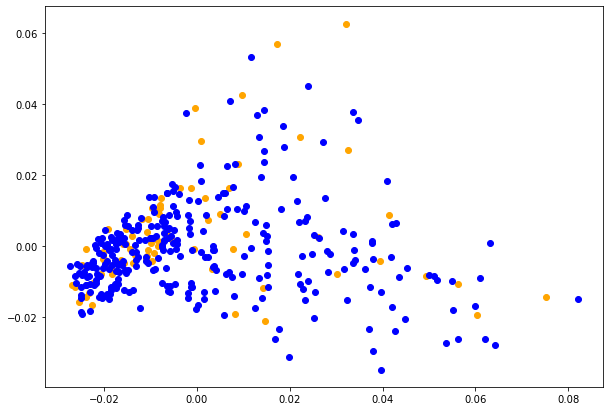

In [46]:
import matplotlib.pyplot as plt
# Visualise results
fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(test_target), ('orange', 'blue')):
    ax.scatter(
        testfeatures [test_target== label, 0],
        testfeatures [test_target== label, 1],
        color=color, label=f'Class {label}'
    )

# Test for different pca

In [47]:
# from sklearn.decomposition import KernelPCA, PCA
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import confusion_matrix,classification_report
# import disarray
# import pandas as pd

    
# for i in range(300,400):
    
#     #pca = KernelPCA(n_components=238, kernel='linear')
#     pca = PCA(n_components=i+1, random_state=42)
#     trainfeatures = pca.fit_transform(trainfeatures_std)
#     testfeatures = pca.transform(testfeatures_std)

#     trainfeatures /= np.sqrt(np.sum(trainfeatures ** 2))
#     testfeatures /= np.sqrt(np.sum(testfeatures ** 2))

#     classifier = MLPClassifier(max_iter=380, hidden_layer_sizes=(41),  activation='relu',random_state=42)
#     nn_model = classifier.fit(trainfeatures, train_target)

#     testscore = nn_model.score(testfeatures, test_target)
#     #print("test_score:",testscore)
    
#     test_predictions = nn_model.predict(testfeatures)
#     print("Iteration", i+1)
#     if (testscore >= 0.85):
#         print("CLASSIFICATION REPORT FOR PCA", i+1)
#         #rint("Confusion MAtrix:")
#         cm = confusion_matrix(test_target,test_predictions)
#         #plot_confusion_matrix(cm, classes = range(2))
#         #print(classification_report(test_target,test_predictions))
#         df = pd.DataFrame(cm)
#         print(df.da.export_metrics(metrics_to_include=['accuracy', 'precision', 'recall', 'specificity', 'f1']))
#         print()
#         print()

        
        

In [48]:
import itertools
from sklearn.metrics import confusion_matrix,classification_report
# Function to plot confusion matrix for validation image   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Neural Network

CLASSIFICATION REPORT FOR Neural Network
Confusion MAtrix:

              precision    recall  f1-score   support

           0       0.71      0.47      0.56        75
           1       0.88      0.95      0.91       304

    accuracy                           0.86       379
   macro avg       0.80      0.71      0.74       379
weighted avg       0.85      0.86      0.85       379

train score: 0.8533333333333334
test_score 0.8575197889182058


/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(


,0,1,micro-average
accuracy,0.857520,0.857520,0.85752
precision,0.714286,0.878788,0.85752
recall,0.466667,0.953947,0.85752
specificity,0.953947,0.466667,0.85752
f1,0.564516,0.914826,0.85752


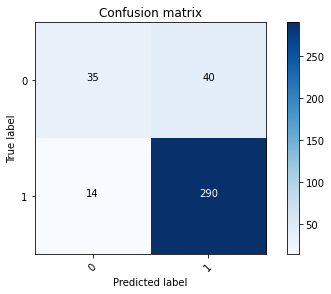

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# classifier = MLPClassifier(max_iter=380, hidden_layer_sizes=(41), activation='relu', 
#                            solver='adam',learning_rate='constant', random_state=42)   86.01
classifier = MLPClassifier(max_iter=244, hidden_layer_sizes=(10,40), activation='relu', 
                            solver='adam',learning_rate='constant', random_state=42) 
#classifier = MLPClassifier(max_iter=430, hidden_layer_sizes=(30), activation='relu',random_state=42) 85.22
#classifier = MLPClassifier(max_iter=197, hidden_layer_sizes=(10,30),  activation='relu',random_state=42)   85.48
#classifier = MLPClassifier(max_iter=380, hidden_layer_sizes=(41),  activation='relu',random_state=42)

"""classifier = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

nn_model = GridSearchCV(classifier, parameter_space, n_jobs=-1, cv=3)

nn_model.fit(train_features, traintarget)"""

# Best paramete set
#print('Best parameters found:\n', nn_model.best_params_)


# All results
"""means = nn_model.cv_results_['mean_test_score']
stds = nn_model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, nn_model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))"""

#Train the model using the training sets 
nn_model = classifier.fit(trainfeatures, train_target)

#Predict the response for test dataset
trainscore = nn_model.score(trainfeatures, train_target)
testscore = nn_model.score(testfeatures, test_target)

test_predictions = nn_model.predict(testfeatures)

print("CLASSIFICATION REPORT FOR Neural Network")
print("Confusion MAtrix:")
cm = confusion_matrix(test_target,test_predictions)
plot_confusion_matrix(cm, classes = range(2))
print()
print(classification_report(test_target,test_predictions))
print("train score:",trainscore)
print("test_score",testscore)


# KFold Cross_Validation
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(Lda_model, train_features, train_dataset_array_labels, cv=10, scoring='accuracy') #cv is cross validation
#print(scores)
#print("Average 10 Fold Cross Valodation Score : ", scores.mean())


#Classification Metrix Print
import disarray
import pandas as pd

df = pd.DataFrame(cm)
df.da.export_metrics(metrics_to_include=['accuracy', 'precision', 'recall', 'specificity', 'f1'])

Text(0.5, 1.0, 'ROC and AUC for ISBI2016')

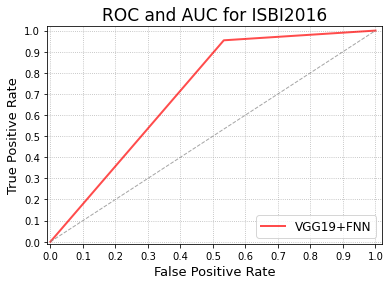

In [50]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

# thresholds = np.linspace(0,0.2,100)

# def get_fp_tp(y, proba, threshold):
#     """Return the number of false positives and true positives."""
#     # source: https://towardsdatascience.com/roc-curve-explained-50acab4f7bd8
#     # Classify into classes
#     pred = pd.Series(np.where(proba>=threshold, 1, 0), dtype='category')
#     pred.cat.set_categories([0,1], inplace=True)
#     # Create confusion matrix
#     confusion_matrix = pred.groupby([y, pred]).size().unstack()\
#                            .rename(columns={0: 'pred_0', 
#                                             1: 'pred_1'}, 
#                                    index={0: 'actual_0', 
#                                           1: 'actual_1'})
#     false_positives = confusion_matrix.loc['actual_0', 'pred_1']
#     true_positives = confusion_matrix.loc['actual_1', 'pred_1']
#     return false_positives, true_positives

# # defining fpr and tpr
# tpr_vgg = []
# fpr_vgg = []
# # defining positives and negatives
# positives = np.sum(test_target==1)
# negatives = np.sum(test_target==0)

# # looping over threshold scores and getting the number of false positives and true positives
# for th in thresholds:
#     fp,tp = get_fp_tp(test_target, test_predictions, th)
#     tpr_vgg.append(tp/positives)
#     fpr_vgg.append(fp/negatives)
    
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
# plt.plot(fpr,tpr, label="ROC Curve",color="blue")
# plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
# plt.xlabel("False Positve Rate")
# plt.ylabel("True Positive Rate")
# plt.legend()
# plt.show()



fpr, tpr, thresholds = roc_curve(test_target, test_predictions)
auc = auc(fpr, tpr)
   
plt.plot(fpr, tpr, c='r', lw=2, alpha=0.7, label='VGG19+FNN')    
#plt.plot(fpr, tpr, c='r', lw=2, alpha=0.7, label=u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c='#808080', lw=1, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'ROC and AUC for ISBI2016', fontsize=17)
#plt.savefig("ROC_AUC_VGG19.png")

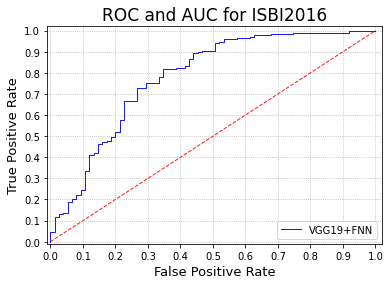

In [51]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt
from sklearn import metrics

# # test_target = # ground truth labels
# # test_predictions = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(test_target, test_predictions)
# plt.show()

y_pred_proba = nn_model.predict_proba(testfeatures)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_target,  y_pred_proba)
auc = metrics.roc_auc_score(test_target, y_pred_proba)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.plot((0, 1), (0, 1), c='r', lw=1, ls='--', alpha=0.9)
plt.plot(fpr,tpr, c='b', lw=1, alpha=0.9, label='VGG19+FNN')
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=10)
plt.title(u'ROC and AUC for ISBI2016', fontsize=17)
plt.show()